In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# introduction

# This is a setp by setp approch to the housing prices

# The Objective

# Predict House sales Prices

# Exploratory Data Analysis

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import gc
import scipy.stats as stats
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)

# Load Data

In [3]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
Submission=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

# Data Exploration

In [4]:
# view the first 5 rows
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#view the last 5 rows
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
#view the data shape , number of rows and columns
shape_train = df_train.shape
shape_test = df_test.shape
print("Shape of df_train - Number of rows:", shape_train[0])
print("Shape of df_train - Number of columns:", shape_train[1])

print("Shape of df_test - Number of rows:", shape_test[0])
print("Shape of df_test - Number of columns:", shape_test[1])

Shape of df_train - Number of rows: 1460
Shape of df_train - Number of columns: 81
Shape of df_test - Number of rows: 1459
Shape of df_test - Number of columns: 80


In [7]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Overview of columns

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Numerical columns

In [9]:
# Select numerical columns in training set
df1 = df_train.select_dtypes(include=['number'])
# Print the numerical columns
print("Numerical columns:")
print(df1.columns.tolist())

Numerical columns:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [10]:
# Select numerical columns in test set
df2 = df_test.select_dtypes(include=['number'])
# Print the numerical columns
print("Numerical columns:")
print(df2.columns.tolist())

Numerical columns:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# MSSubClass

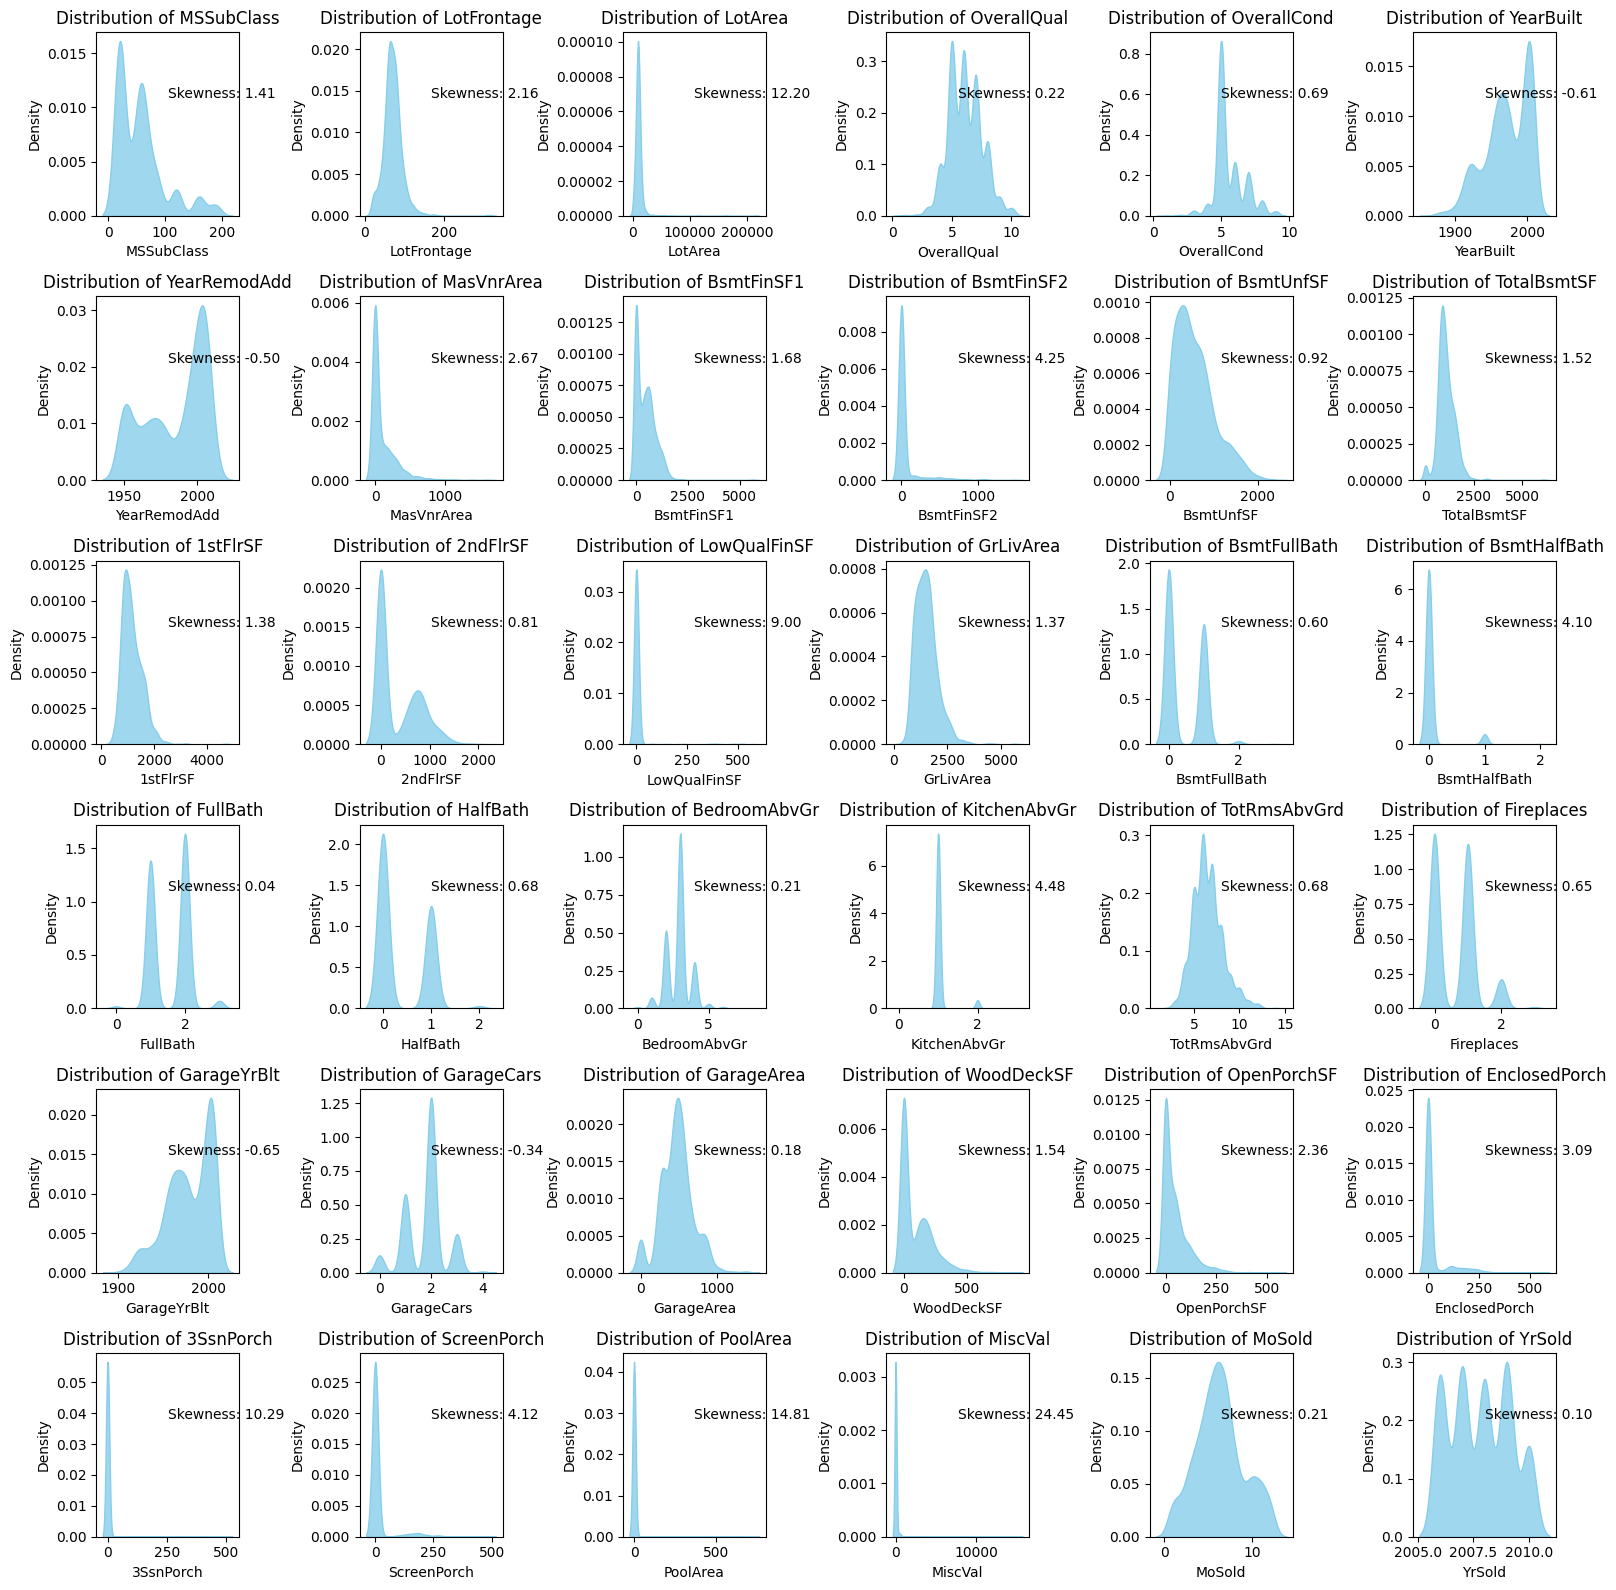

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


column_names = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'][:36]

# Plot distribution curves for each numerical column
plt.figure(figsize=(16, 16))

for i, col in enumerate(column_names):
    plt.subplot(6, 6, i + 1)  # Adjusted to fit in a 6x6 grid
    sns.kdeplot(df_train[col], fill=True, color='skyblue', alpha=0.8)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    # Calculate and print skewness for each column
    skewness = skew(df_train[col].dropna())  # Calculate skewness for the current column
    plt.text(0.5, 0.7, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

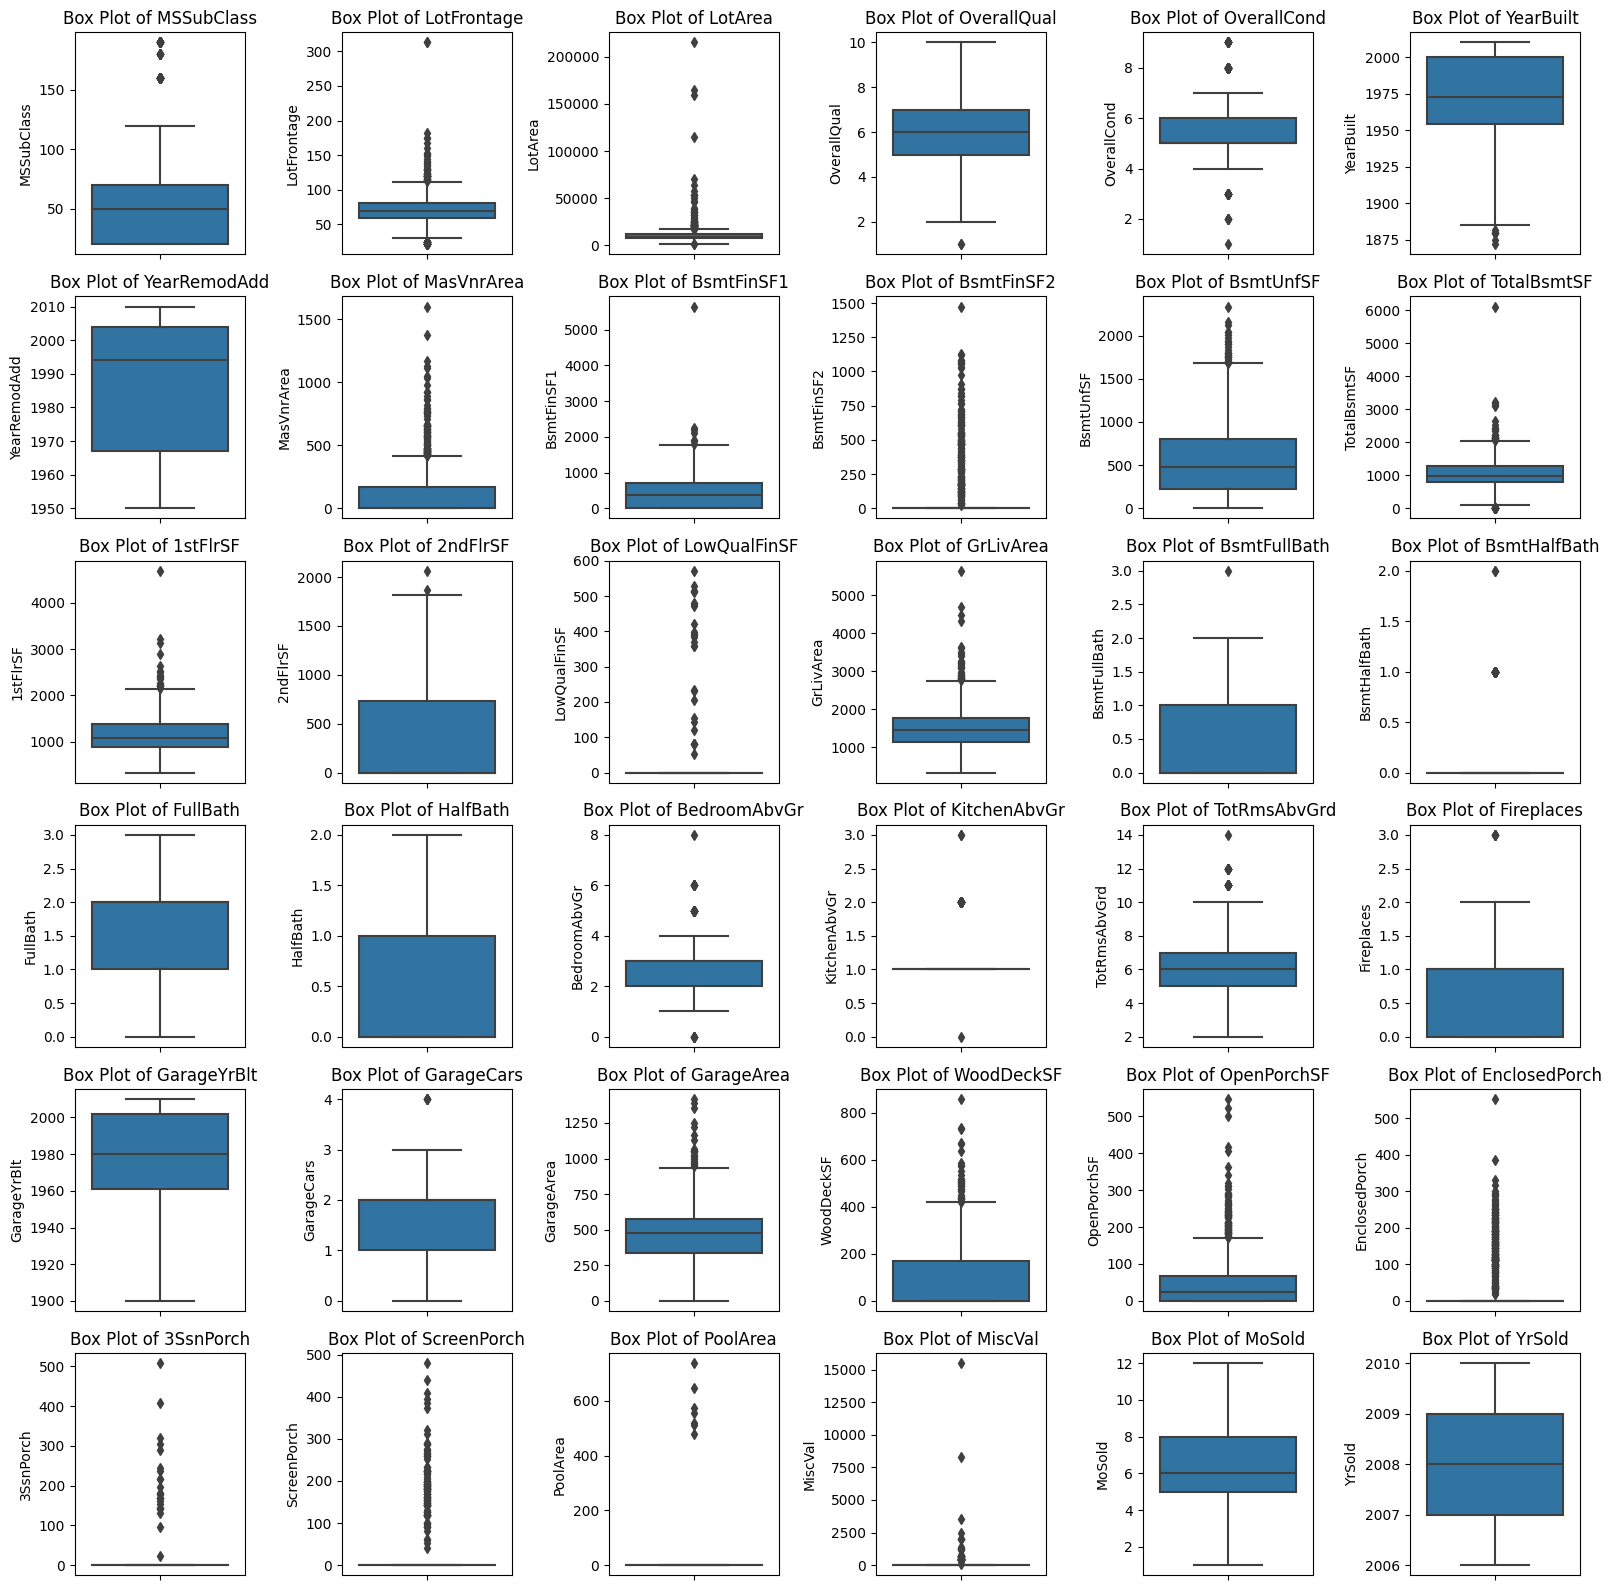

In [13]:
column_names = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'][:36]

# Plot distribution curves and box plots for each numerical column
plt.figure(figsize=(16, 16))

for i, col in enumerate(column_names):
    # Plot box plot
    plt.subplot(6, 6, i + 1)
    sns.boxplot(y=df_train[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

we can see some outliers in some columns

# Categorical columns

In [14]:
# Select categorical columns
df3 = df_train.select_dtypes(include=['object'])

# Print the categorical columns
print("Categorical Columns:")
print(df3.columns.tolist())

Categorical Columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


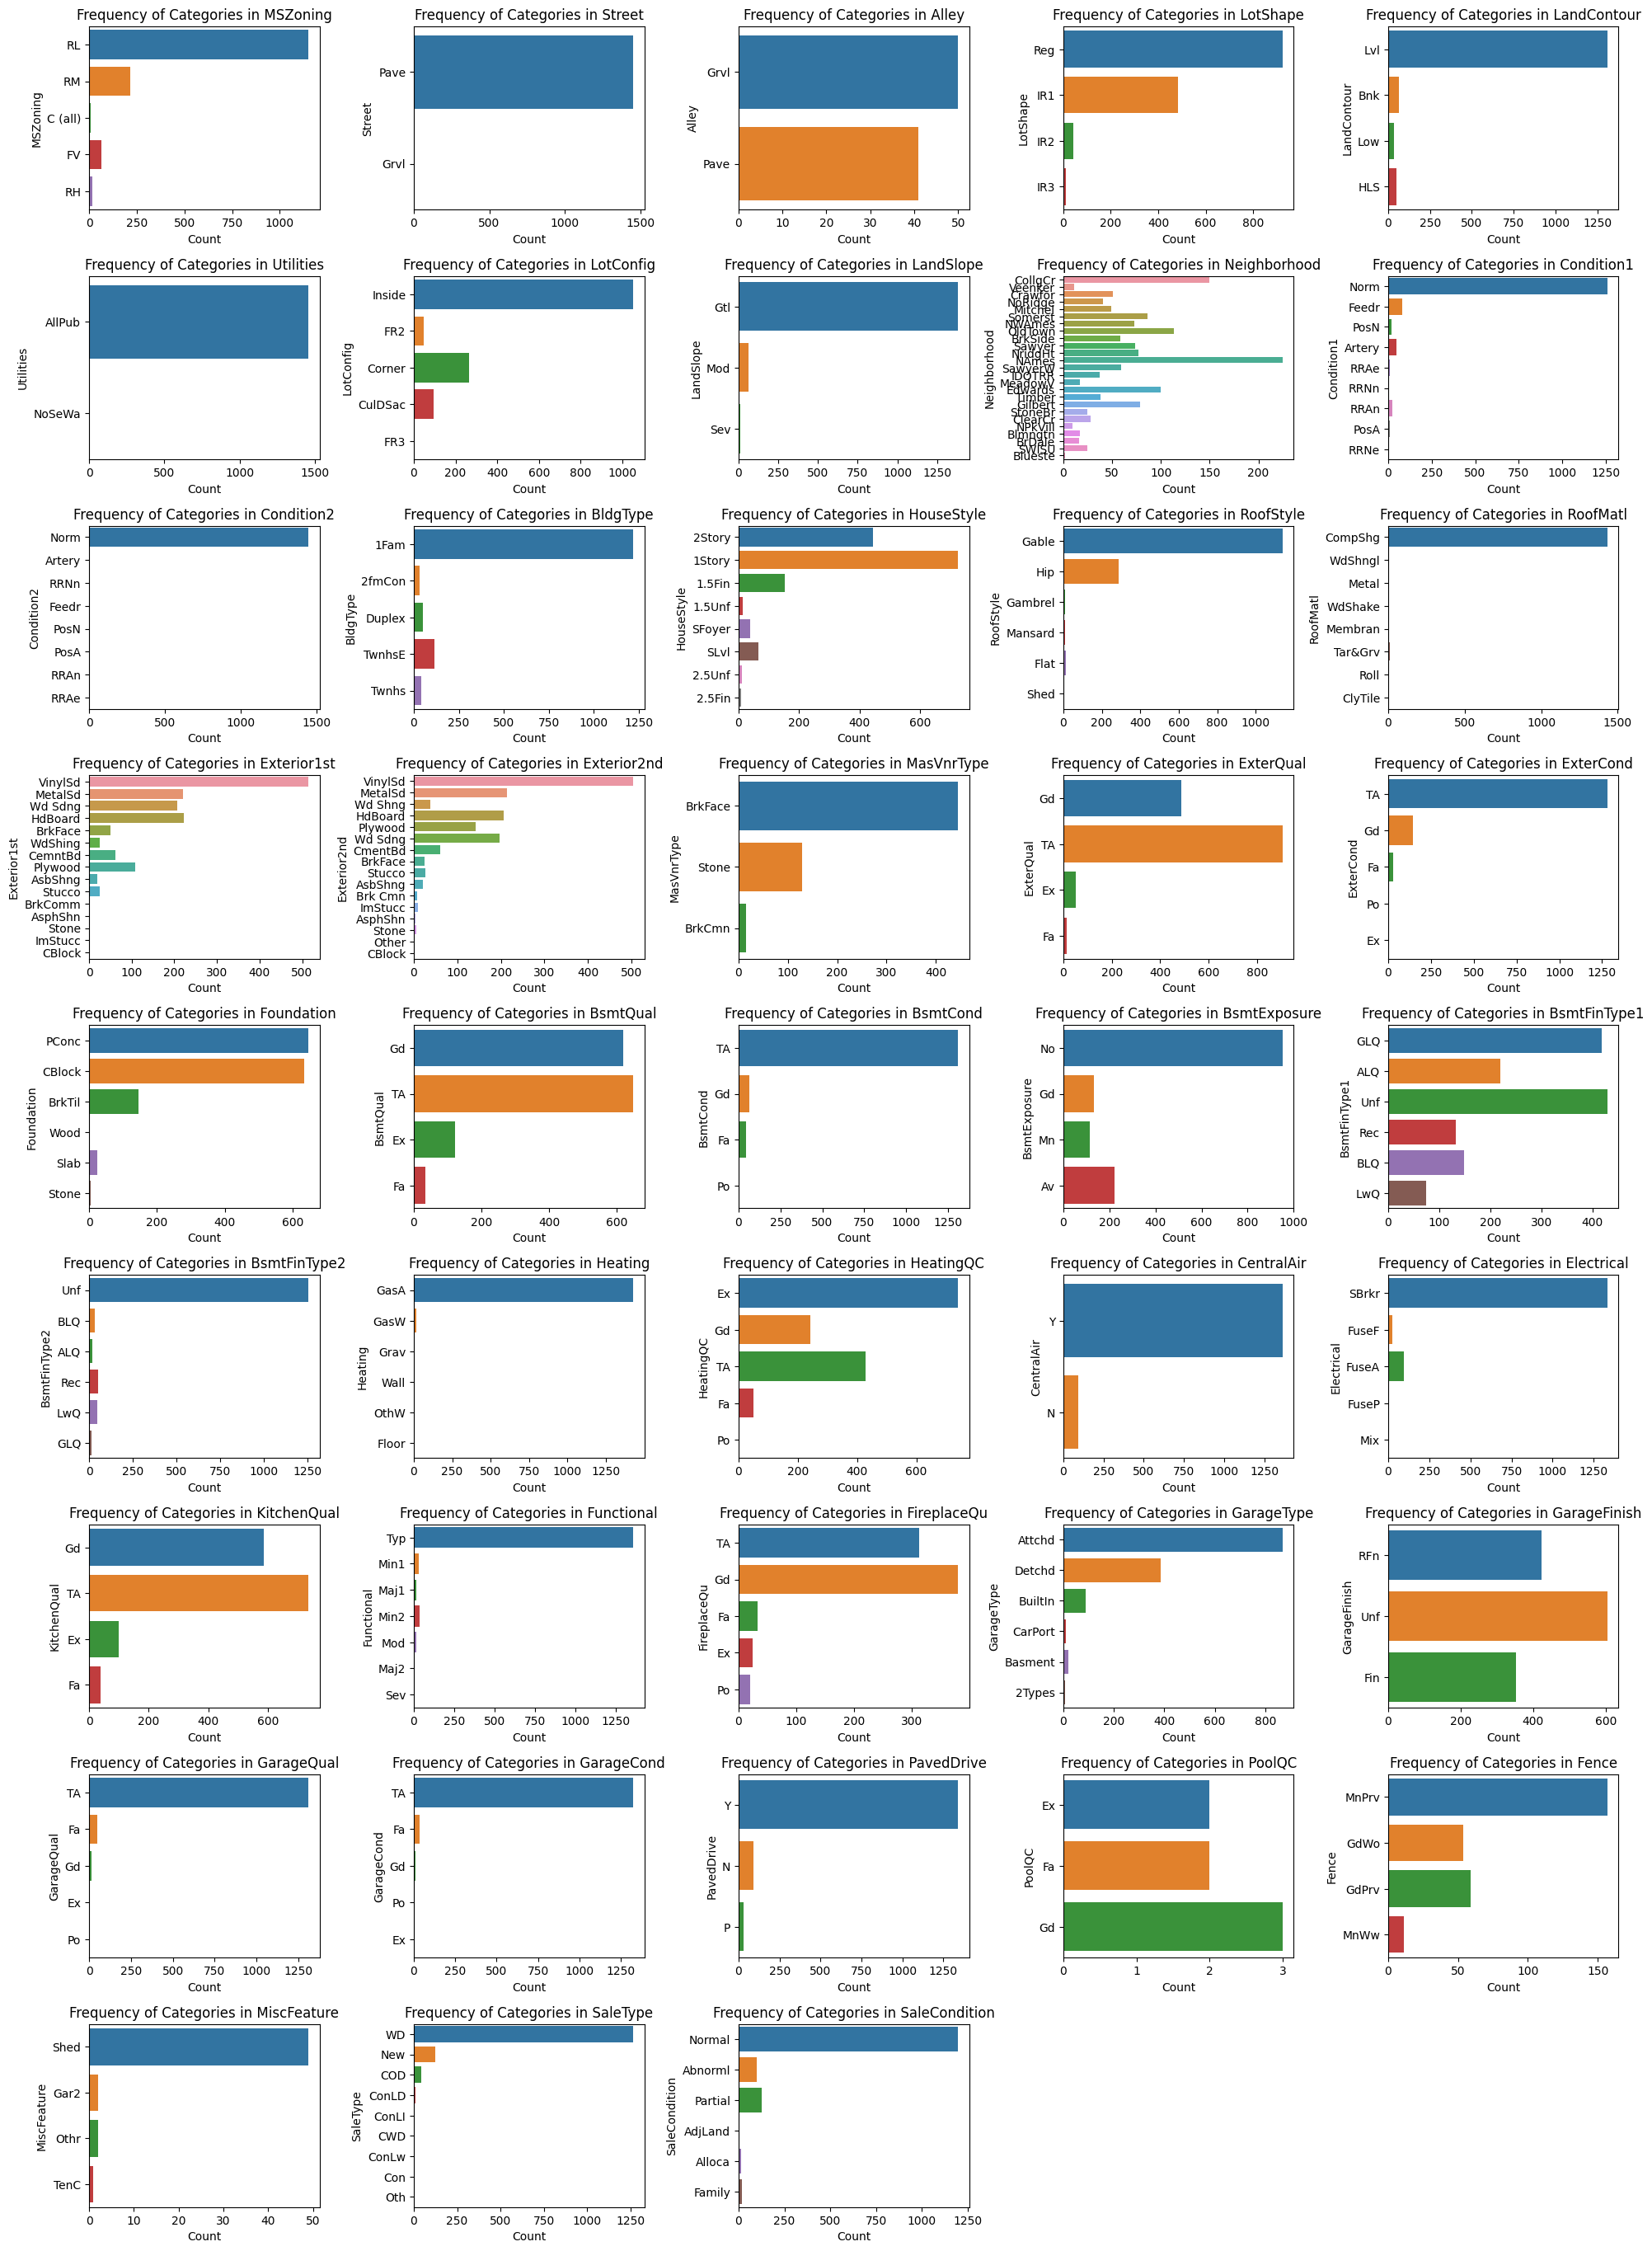

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns to analyze
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                      'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                      'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                      'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                      'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
                      'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                      'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Plot histograms for each categorical column
plt.figure(figsize=(20, 30))

for i, col in enumerate(categorical_columns):
    plt.subplot(10, 5, i + 1)  # Adjusted to fit in a 10x5 grid
    sns.countplot(data=df_train, y=col)
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# Target Variable

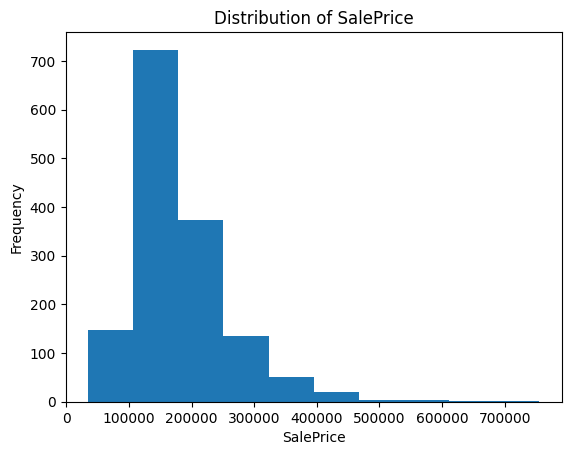

In [16]:
plt.hist(df_train["SalePrice"], bins=10)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrice")
plt.show()

In [17]:
skewness_skewness= df_train['SalePrice'].skew()
skewness_skewness

1.8828757597682129

In [18]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
# correlation of salesprice with Numerical features
correlation_with_target = df1.corr()[['SalePrice']]
correlation_with_target

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420


# Missing values imputation

In [20]:
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

             Missing Values  Missing Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
MasVnrType              872           59.726027
...                     ...                 ...
ExterQual                 0            0.000000
Exterior2nd               0            0.000000
Exterior1st               0            0.000000
RoofMatl                  0            0.000000
SalePrice                 0            0.000000

[81 rows x 2 columns]


In [21]:
missing_values = df_test.isnull().sum()
missing_percentage = (missing_values / len(df_test)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

               Missing Values  Missing Percentage
PoolQC                   1456           99.794380
MiscFeature              1408           96.504455
Alley                    1352           92.666210
Fence                    1169           80.123372
MasVnrType                894           61.274846
...                       ...                 ...
Electrical                  0            0.000000
1stFlrSF                    0            0.000000
2ndFlrSF                    0            0.000000
LowQualFinSF                0            0.000000
SaleCondition               0            0.000000

[80 rows x 2 columns]


In [22]:
# Calculate the percentage of missing values for each column
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100

# Filter columns with missing values greater than 50%
columns_with_high_missing = missing_percentage[missing_percentage > 50]

# Print the columns with missing values greater than 50%
print("Columns with missing values greater than 50%:")
print(columns_with_high_missing)

Columns with missing values greater than 50%:
Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [23]:
# Calculate the percentage of missing values for each column
missing_percentage = (df_test.isnull().sum() / len(df_train)) * 100

# Filter columns with missing values greater than 50%
columns_with_high_missing = missing_percentage[missing_percentage > 50]

# Print the columns with missing values greater than 50%
print("Columns with missing values greater than 50%:")
print(columns_with_high_missing)

Columns with missing values greater than 50%:
Alley          92.602740
MasVnrType     61.232877
PoolQC         99.726027
Fence          80.068493
MiscFeature    96.438356
dtype: float64


In [24]:
# Filter columns with missing values greater than 50%
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Drop the columns with missing values greater than 50%
df_train.drop(columns=columns_to_drop, inplace=True)

# Print the columns that were dropped
print("Dropped columns:")
print(columns_to_drop)

Dropped columns:
Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [25]:
# Filter columns with missing values greater than 50%
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Drop the columns with missing values greater than 50%
df_test.drop(columns=columns_to_drop, inplace=True)

# Print the columns that were dropped
print("Dropped columns:")
print(columns_to_drop)

Dropped columns:
Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [26]:
#NUmerical columns
missing_values = df1.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

               Missing Values  Missing Percentage
LotFrontage               259           17.739726
GarageYrBlt                81            5.547945
MasVnrArea                  8            0.547945
Id                          0            0.000000
OpenPorchSF                 0            0.000000
KitchenAbvGr                0            0.000000
TotRmsAbvGrd                0            0.000000
Fireplaces                  0            0.000000
GarageCars                  0            0.000000
GarageArea                  0            0.000000
WoodDeckSF                  0            0.000000
EnclosedPorch               0            0.000000
HalfBath                    0            0.000000
3SsnPorch                   0            0.000000
ScreenPorch                 0            0.000000
PoolArea                    0            0.000000
MiscVal                     0            0.000000
MoSold                      0            0.000000
YrSold                      0            0.000000


In [27]:
#numerical columns
missing_values = df2.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

               Missing Values  Missing Percentage
LotFrontage               227           15.547945
GarageYrBlt                78            5.342466
MasVnrArea                 15            1.027397
BsmtHalfBath                2            0.136986
BsmtFullBath                2            0.136986
BsmtFinSF2                  1            0.068493
GarageCars                  1            0.068493
GarageArea                  1            0.068493
TotalBsmtSF                 1            0.068493
BsmtUnfSF                   1            0.068493
BsmtFinSF1                  1            0.068493
KitchenAbvGr                0            0.000000
3SsnPorch                   0            0.000000
EnclosedPorch               0            0.000000
OpenPorchSF                 0            0.000000
WoodDeckSF                  0            0.000000
ScreenPorch                 0            0.000000
PoolArea                    0            0.000000
MiscVal                     0            0.000000


In [28]:
#Categorical missing values
missing_values = df3.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

               Missing Values  Missing Percentage
PoolQC                   1453           99.520548
MiscFeature              1406           96.301370
Alley                    1369           93.767123
Fence                    1179           80.753425
MasVnrType                872           59.726027
FireplaceQu               690           47.260274
GarageType                 81            5.547945
GarageCond                 81            5.547945
GarageQual                 81            5.547945
GarageFinish               81            5.547945
BsmtFinType2               38            2.602740
BsmtExposure               38            2.602740
BsmtFinType1               37            2.534247
BsmtQual                   37            2.534247
BsmtCond                   37            2.534247
Electrical                  1            0.068493
KitchenQual                 0            0.000000
CentralAir                  0            0.000000
Functional                  0            0.000000


In [29]:
# Calculate the mode for each categorical column in df_train
mode_values_train = df_train.mode().iloc[0]

# Fill missing values in categorical columns with their respective modes in df_train
df_train.fillna(mode_values_train, inplace=True)

# Print a message indicating completion for df_train
print("Missing values in categorical columns in df_train filled with their respective modes.")

# Calculate the mode for each categorical column in df_test
mode_values_test = df_test.mode().iloc[0]

# Fill missing values in categorical columns with their respective modes in df_test
df_test.fillna(mode_values_test, inplace=True)

# Print a message indicating completion for df_test
print("Missing values in categorical columns in df_test filled with their respective modes.")

Missing values in categorical columns in df_train filled with their respective modes.
Missing values in categorical columns in df_test filled with their respective modes.


In [30]:
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [31]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [32]:
Y=df_train['SalePrice']
df_train = df_train.drop(["Id",'SalePrice'], axis = 1)
df_test = df_test.drop(["Id"], axis = 1)

# Data Cleaning and Feature Engineering

In [33]:
df_train= df_train.select_dtypes(include=['number'])
df_test= df_test.select_dtypes(include=['number'])

In [34]:
# TotalBathrooms
df_train['TotalBathrooms'] = df_train['FullBath'] + 0.5 * df_train['HalfBath']
df_test['TotalBathrooms'] = df_test['FullBath'] + 0.5 * df_test['HalfBath']

# TotalPorchArea
porch_features = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
df_train['TotalPorchArea'] = df_train[porch_features].sum(axis=1)
df_test['TotalPorchArea'] = df_test[porch_features].sum(axis=1)

# TotalArea
df_train['TotalArea'] = df_train['LotArea'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalArea'] = df_test['LotArea'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

# AgeAtSale
df_train['AgeAtSale'] = df_train['YrSold'] - df_train['YearBuilt']
df_test['AgeAtSale'] = df_test['YrSold'] - df_test['YearBuilt']

# Binary Features
binary_features = ['GarageArea', 'PoolArea', 'TotalBsmtSF', 'Fireplaces', 'WoodDeckSF', 'YearRemodAdd']
for feature in binary_features:
    df_train['Has' + feature] = (df_train[feature] > 0).astype(int)
    df_test['Has' + feature] = (df_test[feature] > 0).astype(int)

# HasRemodeled
df_train['HasRemodeled'] = (df_train['YearRemodAdd'] > df_train['YearBuilt']).astype(int)
df_test['HasRemodeled'] = (df_test['YearRemodAdd'] > df_test['YearBuilt']).astype(int)



# AgeOfGarage
df_train['AgeOfGarage'] = df_train['YrSold'] - df_train['GarageYrBlt']
df_test['AgeOfGarage'] = df_test['YrSold'] - df_test['GarageYrBlt']

# TotalSF
df_train['TotalSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalSF'] = df_test['1stFlrSF'] + df_test['2ndFlrSF']

# TotalBathroomsAboveGrade
df_train['TotalBathroomsAboveGrade'] = df_train['FullBath'] + 0.5 * df_train['HalfBath']
df_test['TotalBathroomsAboveGrade'] = df_test['FullBath'] + 0.5 * df_test['HalfBath']

In [35]:
X=df_train
test=df_test

In [36]:
test.shape,X.shape

((1459, 50), (1460, 50))

# Modelling

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = xg_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 32478.62168308053


# Catboost

In [38]:
import catboost
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the CatBoost regressor
catboost_reg = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_state=42)

# Fit the regressor to the training set
catboost_reg.fit(X_train, y_train)
# Predict on the testing set
y_pred = catboost_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

0:	learn: 72419.2011549	total: 60.6ms	remaining: 1m
1:	learn: 67567.5101677	total: 63.6ms	remaining: 31.8s
2:	learn: 63534.1236518	total: 66.7ms	remaining: 22.2s
3:	learn: 59969.6998332	total: 69.8ms	remaining: 17.4s
4:	learn: 56653.1799506	total: 72.6ms	remaining: 14.4s
5:	learn: 53398.0633319	total: 75.3ms	remaining: 12.5s
6:	learn: 50902.8941502	total: 78.2ms	remaining: 11.1s
7:	learn: 48789.7423074	total: 81.2ms	remaining: 10.1s
8:	learn: 46426.0834953	total: 84.4ms	remaining: 9.29s
9:	learn: 44350.2866536	total: 87.3ms	remaining: 8.64s
10:	learn: 42520.0177087	total: 90ms	remaining: 8.1s
11:	learn: 40845.6577914	total: 92.8ms	remaining: 7.64s
12:	learn: 39541.4386396	total: 95.9ms	remaining: 7.28s
13:	learn: 37999.2388485	total: 98.9ms	remaining: 6.96s
14:	learn: 36730.6053715	total: 102ms	remaining: 6.68s
15:	learn: 35591.6941855	total: 105ms	remaining: 6.43s
16:	learn: 34406.7831563	total: 108ms	remaining: 6.23s
17:	learn: 33538.3705997	total: 111ms	remaining: 6.08s
18:	learn: 3

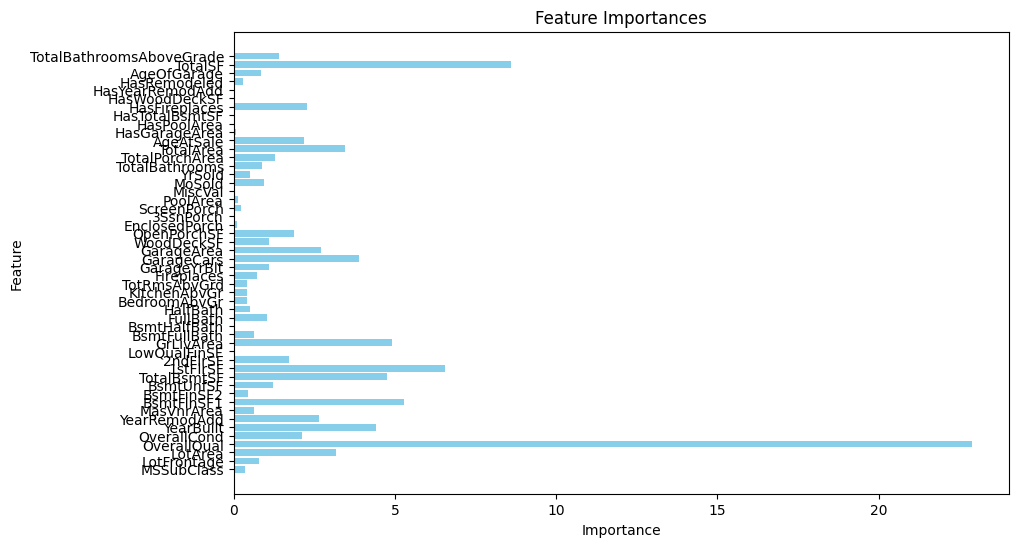

In [39]:
# Get feature importances
feature_importances = catboost_reg.get_feature_importance()

# Get feature names
feature_names = X.columns

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [40]:
y_pred = catboost_reg.predict(test)

In [41]:
y_pred 

array([127079.65964928, 163947.63761601, 191877.33115726, ...,
       191179.53801884, 115459.45537062, 239521.6297399 ])

In [42]:
Submission['SalePrice'] = y_pred 
Submission.to_csv('bechmrck.csv', index=False)
Submission

,Id,SalePrice
0,1461,127079.659649
1,1462,163947.637616
2,1463,191877.331157
3,1464,199725.506521
4,1465,194496.021486
...,...,...
1454,2915,78064.570675
1455,2916,80527.818546
1456,2917,191179.538019
1457,2918,115459.455371
